In [1]:
import numpy as np
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LassoCV
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

SEED = 0

c:\Users\mikec\Desktop\Imperial\TMEF\Amazon-Review-TMEF-Project\text-mining\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_review_normalised = pd.read_csv("review_phone_normalised.csv")
df_review_normalised = df_review_normalised.dropna()

C:\Users\mikec\AppData\Local\Temp\ipykernel_7920\3719648778.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_review_normalised = pd.read_csv("review_phone_normalised.csv")


In [3]:
IS: pd.DataFrame
OS: pd.DataFrame
IS, OOS = train_test_split(
    df_review_normalised,
    test_size=0.2,
    random_state=SEED,
)

In [4]:
df_review_normalised_subset = IS.sample(
    # n=int(5e4),
    frac=1.0,
    random_state=SEED,
)
df_review_normalised_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86551 entries, 811058 to 126815
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   overall     86551 non-null  float64
 1   verified    86551 non-null  bool   
 2   reviewTime  86551 non-null  object 
 3   asin        86551 non-null  object 
 4   reviewText  86551 non-null  object 
 5   vote        86551 non-null  object 
 6   image       86551 non-null  bool   
 7   Year        86551 non-null  int64  
 8   price       86551 non-null  float64
 9   main_cat    86551 non-null  object 
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 6.1+ MB


In [5]:
df_review_normalised_subset

,overall,verified,reviewTime,asin,reviewText,vote,image,Year,price,main_cat
811058,5.0,True,2015-05-12,B00HHNGAQQ,sorry late review sure work atmosphere go use ...,9.0,False,2015,14.74,Cell Phones & Accessories
1968951,1.0,False,2008-01-14,B000EDIOH4,purchase microphone ipod classic mb use record...,4.0,False,2008,4.00,Cell Phones & Accessories
1152126,4.0,True,2015-07-03,B00OXRXKCQ,charger dead happy overall,2.0,False,2015,2.18,Cell Phones & Accessories
1420283,4.0,True,2015-11-10,B00XTDGJ3W,buy surprise gift husband bc want smart watch ...,4,False,2015,7.15,Cell Phones & Accessories
1432429,5.0,True,2016-04-28,B00Y4FF1OM,work bit flimsy feeling hold securely fit expe...,46.0,False,2016,9.99,Cell Phones & Accessories
...,...,...,...,...,...,...,...,...,...,...
982646,5.0,True,2016-06-13,B00L36XK4I,probably good product order drive communicatio...,7.0,True,2016,4.00,Cell Phones & Accessories
815464,5.0,True,2014-05-13,B00HMBA08M,yr old go kid know importance protective case ...,23.0,False,2014,7.99,Cell Phones & Accessories
405430,5.0,True,2013-07-13,B008S1CB1O,return retailer minor flaw love sure defect ki...,2,False,2013,239.99,Cell Phones & Accessories
1122915,1.0,True,2015-10-25,B00NQNIGIG,work ok battery verses rate product original p...,45.0,True,2015,1.96,Cell Phones & Accessories


In [6]:
df_only_one_and_five = df_review_normalised_subset[
    (df_review_normalised_subset["overall"] == 1.0)
    | (df_review_normalised_subset["overall"] == 5.0)
]
df_only_one_and_five

,overall,verified,reviewTime,asin,reviewText,vote,image,Year,price,main_cat
811058,5.0,True,2015-05-12,B00HHNGAQQ,sorry late review sure work atmosphere go use ...,9.0,False,2015,14.74,Cell Phones & Accessories
1968951,1.0,False,2008-01-14,B000EDIOH4,purchase microphone ipod classic mb use record...,4.0,False,2008,4.00,Cell Phones & Accessories
1432429,5.0,True,2016-04-28,B00Y4FF1OM,work bit flimsy feeling hold securely fit expe...,46.0,False,2016,9.99,Cell Phones & Accessories
1194202,5.0,False,2014-12-20,B00Q8KDU6C,love product app big selling point price value...,4.0,False,2014,6.04,Cell Phones & Accessories
101757,1.0,False,2009-01-05,B001BZM998,fool case hard shell state good reinforce nylo...,51,False,2009,19.99,Cell Phones & Accessories
...,...,...,...,...,...,...,...,...,...,...
982646,5.0,True,2016-06-13,B00L36XK4I,probably good product order drive communicatio...,7.0,True,2016,4.00,Cell Phones & Accessories
815464,5.0,True,2014-05-13,B00HMBA08M,yr old go kid know importance protective case ...,23.0,False,2014,7.99,Cell Phones & Accessories
405430,5.0,True,2013-07-13,B008S1CB1O,return retailer minor flaw love sure defect ki...,2,False,2013,239.99,Cell Phones & Accessories
1122915,1.0,True,2015-10-25,B00NQNIGIG,work ok battery verses rate product original p...,45.0,True,2015,1.96,Cell Phones & Accessories


<Axes: xlabel='overall'>

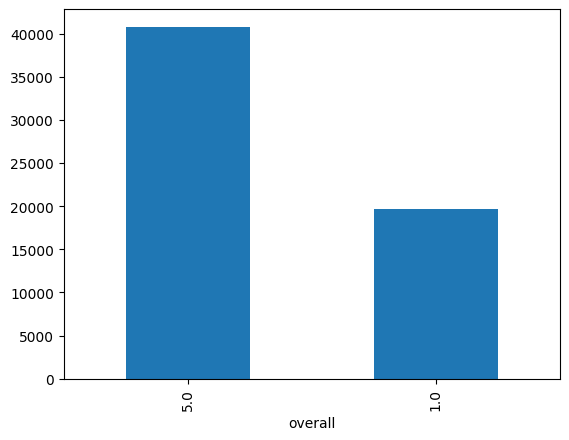

In [7]:
df_only_one_and_five["overall"].value_counts().plot.bar()

In [8]:
# Lasso CV
vectorizer = CountVectorizer(min_df=1)
undersampler = RandomUnderSampler()
lasso_cv = LassoCV(
    cv=5,
    random_state=SEED,
    alphas=[0.001, 0.01, 0.1, 1, 10, 100],
    n_jobs=-1,
)
ml_pipeline = make_pipeline(vectorizer, undersampler, lasso_cv)

X_train, X_test, y_train, y_test = train_test_split(
    df_only_one_and_five["reviewText"],
    df_only_one_and_five["overall"],
    test_size=0.25,
    random_state=SEED,
)
ml_pipeline.fit(X_train, y_train)
vectorizer_step = ml_pipeline.named_steps["countvectorizer"]

X_train_dfm = vectorizer_step.transform(X_train)
X_train_dense = X_train_dfm.todense()
feature_names = vectorizer_step.get_feature_names_out()
X_train_dfm_df = pd.DataFrame(X_train_dense, columns=feature_names)

y_pred = ml_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
best_alpha = ml_pipeline.named_steps["lassocv"].alpha_
print(f"Best alpha: {best_alpha}")

Mean Squared Error: 2.2087361786248554
Best alpha: 0.001


<Axes: xlabel='overall'>

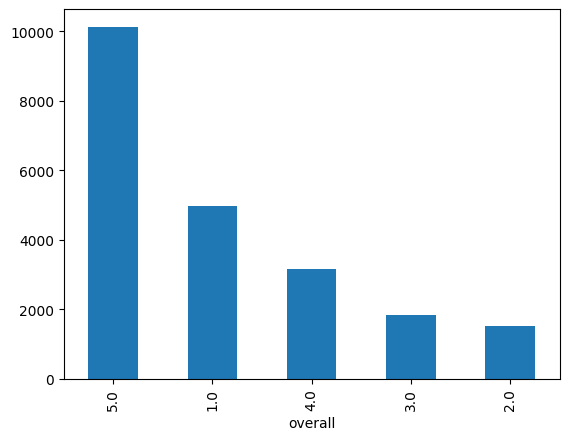

In [9]:
OOS["overall"].value_counts().plot.bar()

In [10]:
results = []
for i in range(1, 6):
    df_given_score = OOS[(OOS["overall"] == float(i))]
    y_pred: np.ndarray = ml_pipeline.predict(df_given_score["reviewText"])
    results.append([i, y_pred.mean(), y_pred.std()])
results = pd.DataFrame(results, columns=["Score", "Mean", "Std"])
results

,Score,Mean,Std
0,1,2.079465,0.952155
1,2,2.421811,1.032623
2,3,2.876003,1.035163
3,4,3.583256,1.213105
4,5,3.964455,1.109178


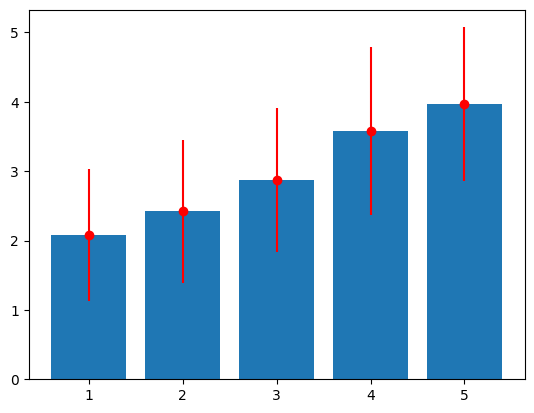

In [11]:
plt.bar(
    list(range(1, 6)),
    results["Mean"],
)
plt.errorbar(
    list(range(1, 6)),
    results["Mean"],
    yerr=results["Std"],
    fmt="o",
    color="r",
)
plt.show()

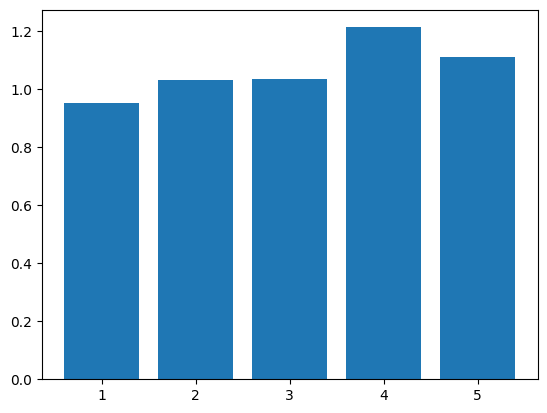

In [12]:
plt.bar(
    list(range(1, 6)),
    results["Std"],
)
plt.show()

In [13]:
analyser = SentimentIntensityAnalyzer()

In [14]:
results = []
for i in range(1, 6):
    reviewText_given_score = IS[(IS["overall"] == float(i))]["reviewText"].tolist()
    for review in reviewText_given_score:
        results.append([i, review, analyser.polarity_scores(review)["compound"]])
results = pd.DataFrame(results, columns=["Score", "review", "polarity"])
results

,Score,review,polarity
0,1,edit comparison pic real model add end buy ada...,0.4019
1,1,buy model brother let try vacation pro easy se...,0.6808
2,1,want love recently get rid stereo stack compon...,0.8834
3,1,suppose certify will charge iphone cable suppl...,0.7269
4,1,open box watch charger,0.0000
...,...,...,...
86546,5,work ear piece good buy ear piece get muffle m...,0.0516
86547,5,stop work month update realize great warranty ...,0.7994
86548,5,want extra pair earbud purse use phone call li...,0.9921
86549,5,hit hard buy,-0.1027


In [15]:
aggregated = (
    results.groupby(['Score'])["polarity"].agg([('polarity mean', 'mean'), ('polarity std', 'std')])
    .reset_index()                                          # make groupers into columns
)
aggregated

,Score,polarity mean,polarity std
0,1,0.064778,0.570698
1,2,0.324326,0.572366
2,3,0.501090,0.502846
3,4,0.689879,0.394761
4,5,0.731137,0.341213


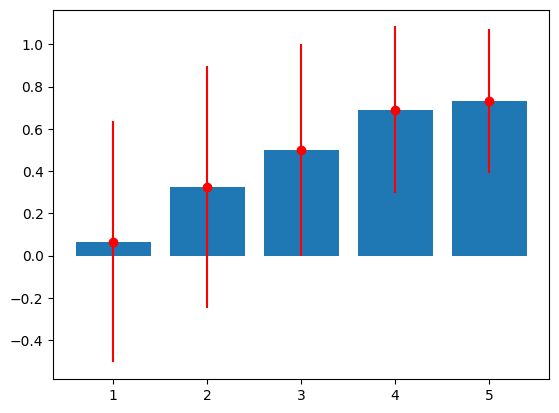

In [16]:
plt.bar(
    list(range(1, 6)),
    aggregated["polarity mean"],
)
plt.errorbar(
    list(range(1, 6)),
    aggregated["polarity mean"],
    yerr=aggregated["polarity std"],
    fmt="o",
    color="r",
)
plt.show()

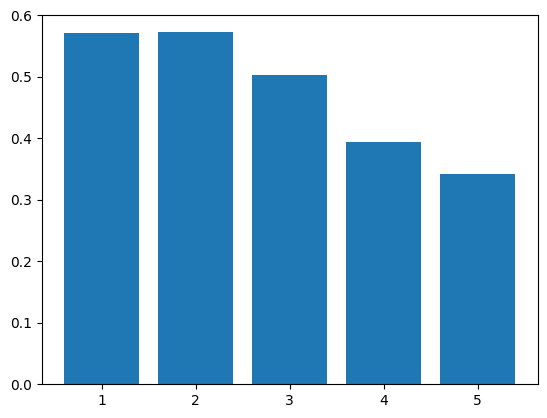

In [17]:
plt.bar(
    list(range(1, 6)),
    aggregated["polarity std"],
)
plt.show()

In [18]:
import torch.nn.functional as F
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("assemblyai/distilbert-base-uncased-sst2")
model = AutoModelForSequenceClassification.from_pretrained(
    "assemblyai/distilbert-base-uncased-sst2"
)

In [19]:
results = []
for i in range(1, 6):
    reviewText_given_score = IS[(IS["overall"] == float(i))]["reviewText"].tolist()
    for review in reviewText_given_score:
        tokenized_segments = tokenizer(
            [review],
            return_tensors="pt",
            padding=True,
            truncation=True,
        )
        tokenized_segments_input_ids, tokenized_segments_attention_mask = (
            tokenized_segments.input_ids,
            tokenized_segments.attention_mask,
        )
        model_predictions = F.softmax(
            model(
                input_ids=tokenized_segments_input_ids,
                attention_mask=tokenized_segments_attention_mask,
            )["logits"],
            dim=1,
        )
        # Positive probability
        results.append([i, review, model_predictions[0][1].item()])
results = pd.DataFrame(results, columns=["Score", "review", "polarity"])
results

,Score,review,polarity
0,1,edit comparison pic real model add end buy ada...,0.085738
1,1,buy model brother let try vacation pro easy se...,0.674170
2,1,want love recently get rid stereo stack compon...,0.108060
3,1,suppose certify will charge iphone cable suppl...,0.517917
4,1,open box watch charger,0.707627
...,...,...,...
86546,5,work ear piece good buy ear piece get muffle m...,0.427362
86547,5,stop work month update realize great warranty ...,0.830846
86548,5,want extra pair earbud purse use phone call li...,0.584927
86549,5,hit hard buy,0.673706


In [20]:
aggregated = (
    results.groupby(['Score'])["polarity"].agg([('polarity mean', 'mean'), ('polarity std', 'std')])
    .reset_index()                                          # make groupers into columns
)
aggregated

,Score,polarity mean,polarity std
0,1,0.261338,0.234547
1,2,0.328660,0.240811
2,3,0.401892,0.254129
3,4,0.519320,0.269589
4,5,0.643441,0.278484


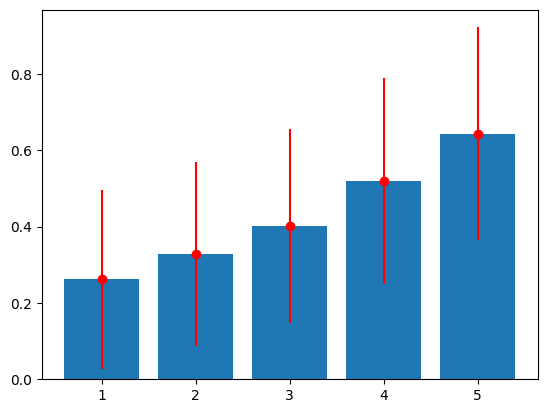

In [21]:
plt.bar(
    list(range(1, 6)),
    aggregated["polarity mean"],
)
plt.errorbar(
    list(range(1, 6)),
    aggregated["polarity mean"],
    yerr=aggregated["polarity std"],
    fmt="o",
    color="r",
)
plt.show()

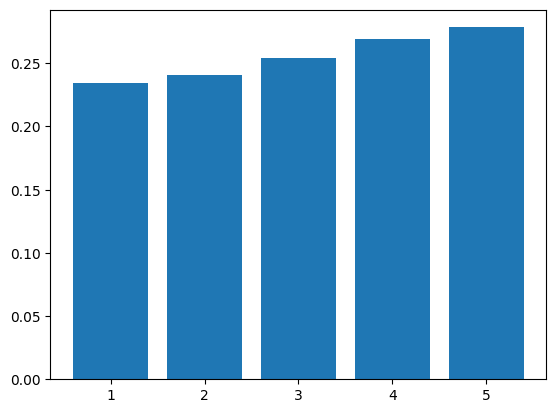

In [22]:
plt.bar(
    list(range(1, 6)),
    aggregated["polarity std"],
)
plt.show()